# Sales Prediction Using Simple Linear Regression

## Introduction:

Sales prediction is a crucial task for businesses to optimize their advertising strategies and maximize sales potential. In this project, we will use simple linear regression to predict future sales based on advertising expenditure.

### 1. Load the Data:

Load the dataset containing information about advertising expenditure on TV, newspaper, radio, and corresponding sales figures.

In [1]:
import pandas as pd

In [3]:
sales_data = pd.read_csv(r'F:\CODSOFT\advertising.csv')

In [4]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 2. Explore the Data:

Examine the structure of the dataset, including column names, data types, summary statistics, and missing values.

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### 3. Select the Independent Variable:

Analyze the correlation between each advertising medium (TV, newspaper, radio) and sales to select the most suitable independent variable.

In [9]:
correlation = sales_data.corr()

In [10]:
print(correlation)


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [11]:
print(correlation['Sales'])


TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64


### 4. Prepare the Data:

Choose the advertising medium with the highest correlation with sales as the independent variable. Separate the selected independent variable (X) and the dependent variable (sales) (y). Split the data into training and testing sets to evaluate the model's performance.

In [12]:
X = sales_data['TV'].values.reshape(-1, 1)

In [15]:
y = sales_data['Sales'].values


### 5. Build and Train the Model:

Create a simple linear regression model using Scikit-learn's LinearRegression class. Train the model using the training data.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 6. Evaluate the Model:

Predict sales values using the trained model on the testing set. Evaluate the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [20]:
y_pred = model.predict(X_test)


In [21]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.9502948931650088
Mean Squared Error: 6.101072906773963
R-squared: 0.802561303423698


### 7. Visualize the Results:

Plot the actual sales values against the predicted sales values to visualize the model's performance.

In [23]:
import matplotlib.pyplot as plt


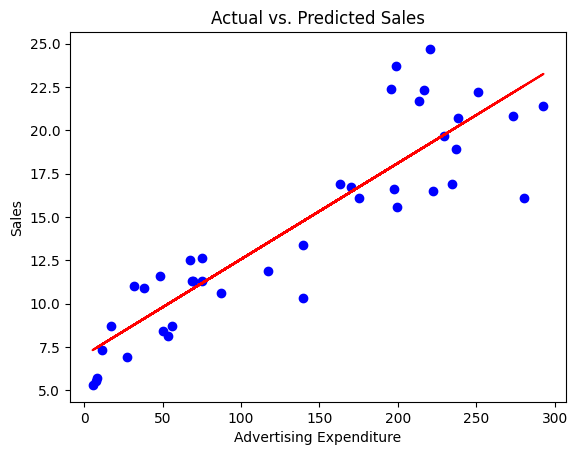

In [24]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

### Conclusion:

In this project, we successfully built a simple linear regression model to predict future sales based on advertising expenditure. By analyzing the correlation between advertising mediums and sales, we identified the most influential factor for sales prediction. The model's performance was evaluated using various metrics, providing insights into its accuracy and effectiveness in predicting sales.